**Model for TITANIC survival prediction**

The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City.

This model is design for detection of survival of a person in Titanic.

---


Data:

Dependent / Traget variable = Survived | 1= Survived , 0=Not Survived

Embarked - S =Southampton, C =Cherbourg , Q =Queenstown

Pclass - 1= 1st class , 2= 2nd class , 3= 3rd class

SibSp - Siblings or spouse data of the passenger.

Parch - Parent or Child data of the passenger.

In [117]:
#importing all necessery libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
# Importing Titanic dataset

df= pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**1. EDA (Univariate , Multivariate , KDE , Pearson Correlation)**

---



In [119]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
# set index column as passengerid
df= df.set_index("PassengerId")


In [122]:
df.shape

(891, 11)

In [123]:
# checking for Null values
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

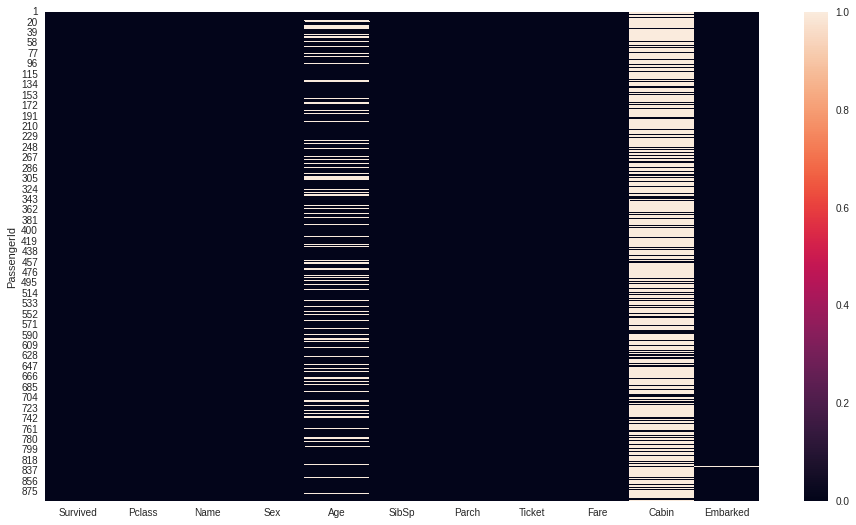

In [124]:
plt.figure(figsize=(16,9))   ;                    # plotting the null values using heatmap
sns.heatmap(df.isnull());

In [125]:
# Cabin columns has 687 null values out of 891 entries. which is more then 50% (77%) .  

In [126]:
#droping the Cabin column 
df.drop('Cabin',axis=1,inplace=True)

In [127]:
df.drop('Ticket',axis=1,inplace=True) # Droping Ticket column for my design its's not useful.

In [128]:
df.shape

(891, 9)

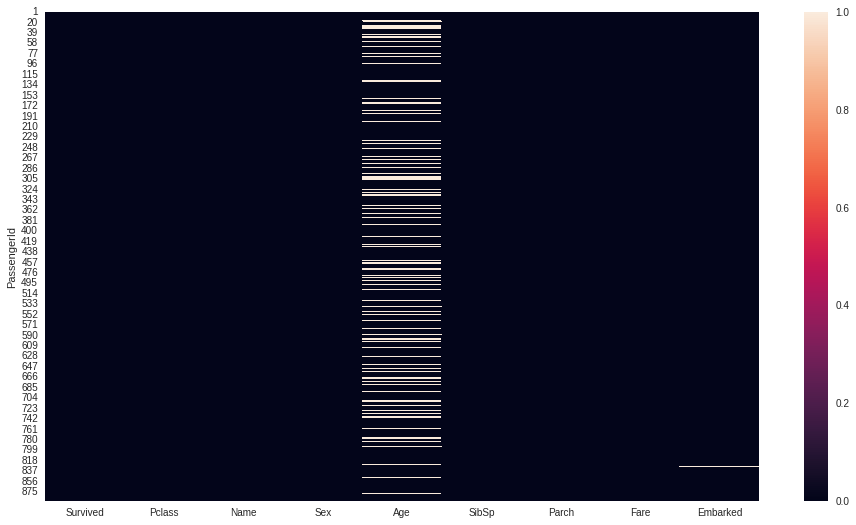

In [129]:
plt.figure(figsize=(16,9))   ;                    # plotting the null values using heatmap
sns.heatmap(df.isnull());

In [130]:
  # Age column and Embarked column has null values which will be handle in Data preprocessing

**Univariate Analysis**

0    549
1    342
Name: Survived, dtype: int64

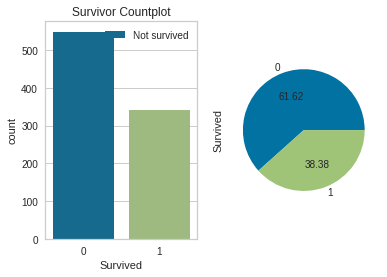

In [131]:
plt.subplot(1,2,1)
sns.countplot(x=df['Survived']);
plt.legend(labels=['Not survived','Survived']);
plt.title('Survivor Countplot');
plt.subplot(1,2,2)
df['Survived'].value_counts().plot(kind='pie',autopct='%.2f')
df['Survived'].value_counts()

In [132]:
# As we can see from the countplot most of the people (549) people died;

3    491
1    216
2    184
Name: Pclass, dtype: int64

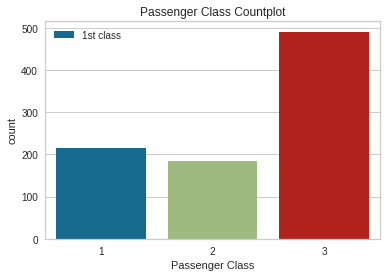

In [133]:
sns.countplot(x=df['Pclass'])
plt.legend(labels=["1st class","2nd class","3rd class"]);
plt.xlabel("Passenger Class");
plt.title('Passenger Class Countplot');
df['Pclass'].value_counts()

In [134]:
# Most of the people travelled in 3rd class.

S    644
C    168
Q     77
Name: Embarked, dtype: int64

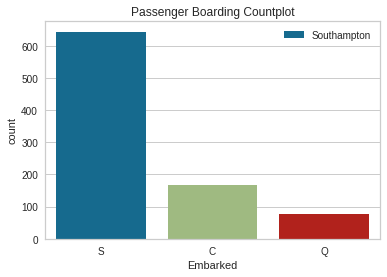

In [135]:
sns.countplot(x=df['Embarked'])
plt.legend(labels=["Southampton","C","Q"]);
plt.title('Passenger Boarding Countplot');
df['Embarked'].value_counts()

In [136]:
# Most  of the People boarded from Southampton (644), some people from Cherbourg(168), and few people from Queenstown(77).

male      577
female    314
Name: Sex, dtype: int64

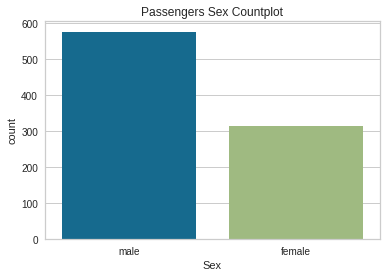

In [137]:
sns.countplot(x=df['Sex'])
plt.title('Passengers Sex Countplot');
df['Sex'].value_counts()

In [138]:
# More Male passenger travelling in Titanic as compared to Female.

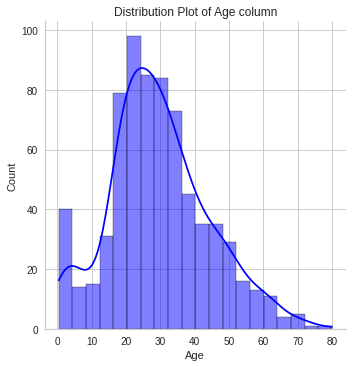

In [139]:
sns.displot(x=df['Age'],kde=True,color='Blue');
plt.title("Distribution Plot of Age column");

In [140]:
# Most people travelling in titanic is young , having age between 20-30.

**Multivariate Analysis**

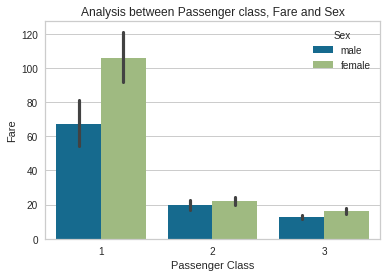

In [141]:
sns.barplot(x=df['Pclass'],y=df['Fare'],hue=df['Sex']);
plt.xlabel("Passenger Class");
plt.title("Analysis between Passenger class, Fare and Sex");

In [142]:
# We can see that fare is high for the female passengers travelling in the 1st class compared to the  male passengers travelling in first class.

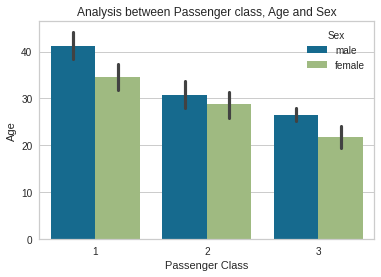

In [143]:
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Sex']);
plt.xlabel("Passenger Class");
plt.title("Analysis between Passenger class, Age and Sex");

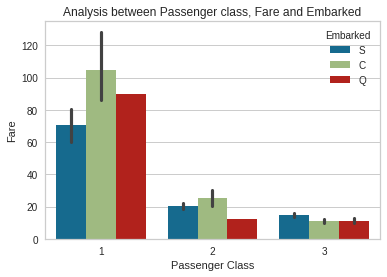

In [144]:
sns.barplot(x=df['Pclass'],y=df['Fare'],hue=df['Embarked']);
plt.xlabel("Passenger Class");
plt.title("Analysis between Passenger class, Fare and Embarked");

In [145]:
# Most of the passengers travelling in 1st class boarded from Cherbourg.

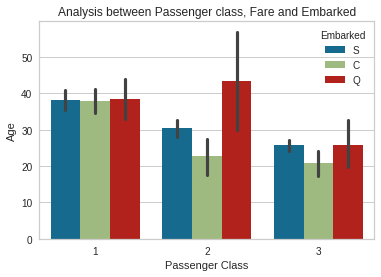

In [146]:
sns.barplot(x=df['Pclass'],y=df['Age'],hue=df['Embarked']);
plt.xlabel("Passenger Class");
plt.title("Analysis between Passenger class, Fare and Embarked");

In [147]:
# In 1st Class, all passengers are of same age group.

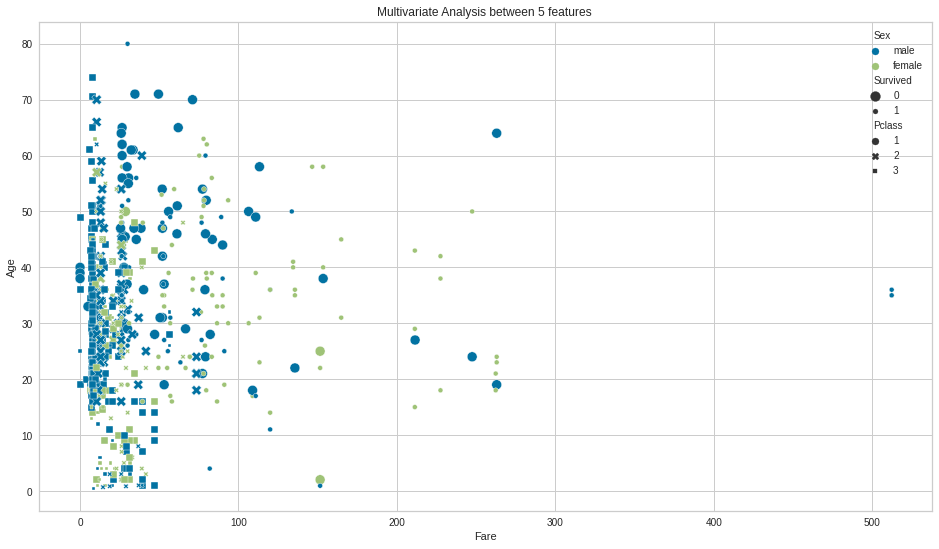

In [148]:
plt.figure(figsize=[16,9]);
sns.scatterplot(x=df['Fare'],y=df['Age'],hue=df['Sex'],style=df['Pclass'],size=df['Survived']);
plt.title("Multivariate Analysis between 5 features ");

In [149]:
# Observations:
#  1. Fare is almost same with age (not considering Passenger class).
#  2. Oldest person in Titanic is a Male paid less then $100 and belong to 1st class is Survived.
#  3. There are only two person in Titanic paid fare more then $500 is male belong to 1st class is Survived.

Pearson Correlation

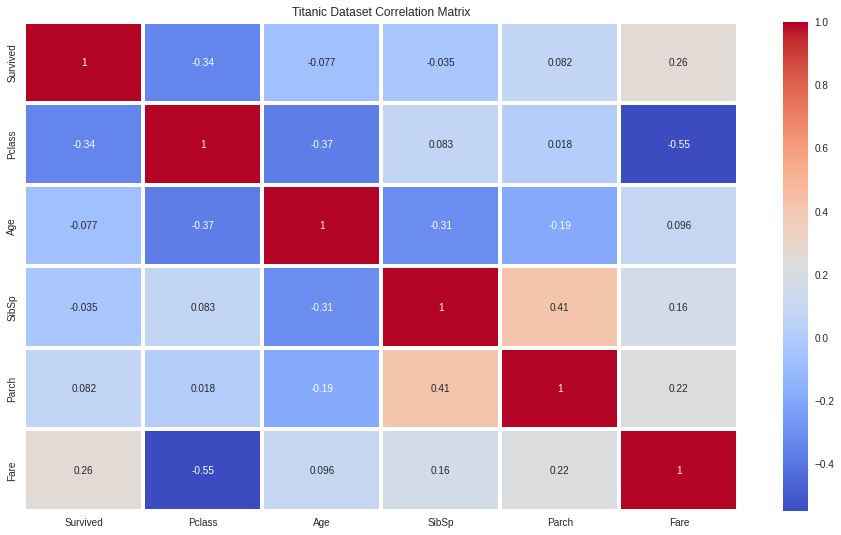

In [150]:
plt.figure(figsize=(16,9))   ;  
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, linewidth=3);
plt.title("Titanic Dataset Correlation Matrix");

In [151]:
# Target Class has strong correlation with Fare.

**2. Data Preprocessing   ( Imputaion, Creating 2 New Feature )**

---



In [152]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [153]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Imputation**


In [154]:
df['Embarked'].fillna('S',inplace=True) # As most of the people boarded Titanic from Southampton , so replacing 2 Null values with S.

In [155]:
df.isnull().sum()[df.isnull().sum()>0]

Age    177
dtype: int64

In [156]:
df.groupby(['Pclass','Sex'])['Age'].median() # Reference to 30 no cell plot.

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [157]:
df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform('median'),inplace=True)

In [158]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Creating New Features**

In [159]:
df.shape

(891, 9)

1st feature

In [160]:
df['Total_family']=df['Parch']+df['SibSp']+1

In [161]:
df.shape

(891, 10)

In [162]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Total_family
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2


2nd Feature

In [163]:
def func (df):
    if df["Total_family"]>1 :
        return 0
    else :
        return 1

In [164]:
df['solo_traveller'] =df.apply(lambda  df:func(df),axis=1)      

In [165]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Total_family,solo_traveller
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1


In [166]:
df.shape

(891, 11)

In [167]:
# Droping all unnecessary columns

df.drop('SibSp',axis=1,inplace=True)
df.drop('Parch',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)

In [168]:
df.shape

(891, 8)

In [169]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Total_family,solo_traveller
PassengerId,,,,,,,,
1,0,3,male,22.0,7.2500,S,2,0
2,1,1,female,38.0,71.2833,C,2,0


**Segregetting Dependent and Independent variables**

In [170]:
X = df.drop('Survived', axis=1)

In [171]:
X.head(2)

,Pclass,Sex,Age,Fare,Embarked,Total_family,solo_traveller
PassengerId,,,,,,,
1,3,male,22.0,7.2500,S,2,0
2,1,female,38.0,71.2833,C,2,0


In [172]:
Y = df['Survived']

In [173]:
Y.head(2)

PassengerId
1    0
2    1
Name: Survived, dtype: int64

**Converting catagorical columns**

In [174]:
df.select_dtypes(exclude=['int64', 'float64']).columns     

Index(['Sex', 'Embarked'], dtype='object')

In [175]:
from sklearn.preprocessing import OneHotEncoder

In [176]:
ohe_sex = OneHotEncoder(sparse=False,handle_unknown='ignore')
ohe_embarked = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [177]:
X_sex = ohe_sex.fit_transform(X[['Sex']])

In [178]:
X_embarked= ohe_embarked.fit_transform(X[['Embarked']])

In [179]:
X_sex

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [180]:
X_embarked

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [181]:
X.head(2)

,Pclass,Sex,Age,Fare,Embarked,Total_family,solo_traveller
PassengerId,,,,,,,
1,3,male,22.0,7.2500,S,2,0
2,1,female,38.0,71.2833,C,2,0


In [182]:
X.drop('Sex',axis=1,inplace=True)
X.drop('Embarked',axis=1,inplace=True)

In [183]:
X.head(2)

,Pclass,Age,Fare,Total_family,solo_traveller
PassengerId,,,,,
1,3,22.0,7.2500,2,0
2,1,38.0,71.2833,2,0


In [184]:
X_new =np.concatenate((X,X_sex,X_embarked),axis=1)

In [185]:
X_new

array([[ 3.    , 22.    ,  7.25  , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 38.    , 71.2833, ...,  1.    ,  0.    ,  0.    ],
       [ 3.    , 26.    ,  7.925 , ...,  0.    ,  0.    ,  1.    ],
       ...,
       [ 3.    , 21.5   , 23.45  , ...,  0.    ,  0.    ,  1.    ],
       [ 1.    , 26.    , 30.    , ...,  1.    ,  0.    ,  0.    ],
       [ 3.    , 32.    ,  7.75  , ...,  0.    ,  1.    ,  0.    ]])

 **Spliting the Dataset into train and test**




In [186]:
from sklearn.model_selection import train_test_split

In [187]:
x_train,x_test,y_train,y_test=train_test_split(X_new,Y,test_size=0.20,random_state= 1)

In [188]:
x_train.shape  , x_test.shape

((712, 10), (179, 10))

In [189]:
y_train.shape  , y_test.shape

((712,), (179,))

**Model Build 1 (Decision Tree Classifier)**

In [190]:
from sklearn.tree import DecisionTreeClassifier


In [191]:
model1 =DecisionTreeClassifier()
model1.fit(x_train , y_train)

DecisionTreeClassifier()

**Model Build 2 (Random Forest Classifier)**

In [192]:
from sklearn.ensemble  import RandomForestClassifier

In [193]:
model2= RandomForestClassifier(n_estimators=100,criterion='gini')
model2.fit(x_train,y_train)

RandomForestClassifier()

**3. Cross Validation**

---



In [194]:
from sklearn.model_selection import cross_val_score

In [195]:
crvs_dt = cross_val_score(model1,X_new,Y,cv=20)
crvs_dt                                                          

array([0.73333333, 0.8       , 0.82222222, 0.75555556, 0.64444444,
       0.68888889, 0.71111111, 0.8       , 0.84444444, 0.77777778,
       0.77777778, 0.75      , 0.70454545, 0.90909091, 0.75      ,
       0.72727273, 0.86363636, 0.77272727, 0.79545455, 0.86363636])

In [196]:
# Cross validation score of decision tree classifier model 

In [197]:
crvs_rf = cross_val_score(model2,X_new,Y,cv=20)
crvs_rf                                                           

array([0.66666667, 0.82222222, 0.8       , 0.82222222, 0.77777778,
       0.73333333, 0.8       , 0.8       , 0.95555556, 0.82222222,
       0.88888889, 0.77272727, 0.75      , 0.90909091, 0.84090909,
       0.72727273, 0.84090909, 0.79545455, 0.79545455, 0.90909091])

In [198]:
# Cross validation score of Random Forest Classifier model

**Model Predict**

In [199]:
dt_pred=model1.predict(x_test)  # Decision Tree Model prediction

In [200]:
rf_pred=model2.predict(x_test)  # Random forest Model prediction

**4. ROC. Precesion/Recall**

---



In [201]:
from yellowbrick.classifier import ROCAUC

In [202]:
from sklearn.metrics import classification_report

In [203]:
dt_report= classification_report(y_test,dt_pred)

In [204]:
print(dt_report)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       106
           1       0.72      0.63      0.67        73

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



In [205]:
# Precision , Recall report for decision tree classifier

In [206]:
rf_report= classification_report(y_test,rf_pred)

In [207]:
print(rf_report)

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       106
           1       0.78      0.62      0.69        73

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



In [208]:
 # Precision , Recall report for Random Forest classifier

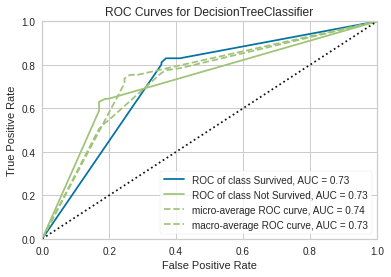

In [209]:
dt_plt=ROCAUC(model1,classes=["Survived","Not Survived"])
dt_plt.fit(x_train,y_train)
dt_plt.score(x_test,y_test)
dt_plt.show();

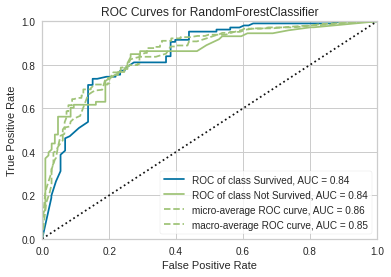

In [210]:
rf_plt=ROCAUC(model2,classes=["Survived","Not Survived"])
rf_plt.fit(x_train,y_train)
rf_plt.score(x_test,y_test)
rf_plt.show();

**5. Pipeline**

---

